In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Photovoltaic

In [ ]:
INPUT_DATA = "../data/POWER_Point_Hourly_20111231_20210101_001d7523N_127d9942E_LST.csv"

In [ ]:
with open(INPUT_DATA, "r") as f:
    text = ''
    texts = []
    nrows_header = 0
    while "-END HEADER-" not in text:
        text = f.readline()
        print(text.strip('\n'))
        texts.append(text)
        nrows_header += 1

-BEGIN HEADER-
NASA/POWER CERES/MERRA2 Native Resolution Hourly Data 
Dates (month/day/year): 12/31/2011 through 01/01/2021 
Location: Latitude  1.7523   Longitude 127.9942 
Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 37.91 meters
The value for missing source data that cannot be computed or is outside of the sources availability range: -999 
Parameter(s): 
ALLSKY_SFC_SW_DWN     CERES SYN1deg All Sky Surface Shortwave Downward Irradiance (Wh/m^2) 
CLRSKY_SFC_SW_DWN     CERES SYN1deg Clear Sky Surface Shortwave Downward Irradiance (Wh/m^2) 
SZA                   CERES SYN1deg Solar Zenith Angle (Degrees) 
-END HEADER-


In [ ]:
df = pd.read_csv(INPUT_DATA",
                 skiprows=nrows_header)

for i, v in df['HR'].items():
    if v == 23:
        break

df = df[i+1:i-23]  # slice to start from 0 and end at 23
df.head()

,YEAR,MO,DY,HR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,SZA
15,2012,1,1,0,0.0,0.0,-999.0
16,2012,1,1,1,0.0,0.0,-999.0
17,2012,1,1,2,0.0,0.0,-999.0
18,2012,1,1,3,0.0,0.0,-999.0
19,2012,1,1,4,0.0,0.0,-999.0


In [ ]:
df.drop(df.loc[df['CLRSKY_SFC_SW_DWN']==0].index, inplace=True)
df.head()

,YEAR,MO,DY,HR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,SZA
21,2012,1,1,6,6.75,7.33,88.86
22,2012,1,1,7,60.55,153.38,77.57
23,2012,1,1,8,140.72,387.98,64.05
24,2012,1,1,9,328.36,623.08,50.99
25,2012,1,1,10,473.39,796.38,38.95


In [ ]:
MIN_VAL = np.min(df[['ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN']].values)
MAX_VAL = np.max(df[['ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN']].values)

<Figure size 640x480 with 0 Axes>

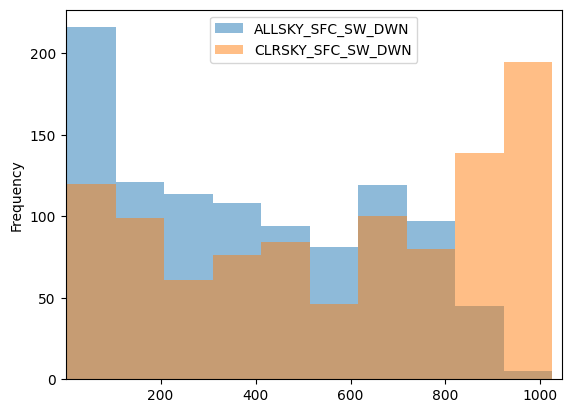

In [ ]:
plt.figure()

df[['ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN']].plot.hist(alpha=0.5)

ax = plt.gca()
ax.set_xlim([MIN_VAL, MAX_VAL])

plt.show()


<Figure size 640x480 with 0 Axes>

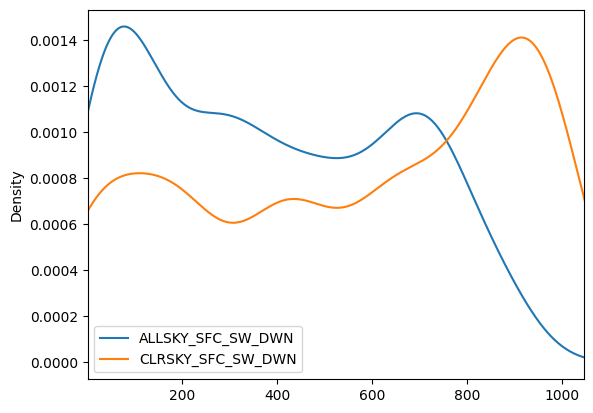

In [ ]:
plt.figure()

df[['ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN']].plot.kde()

ax = plt.gca()
ax.set_xlim([MIN_VAL, MAX_VAL])

plt.show()

## Wind

In [ ]:
INPUT_DATA = "../data/POWER_Point_Hourly_20201231_20220101_000d8018N_127d9988E_LST.csv"

In [ ]:
with open(INPUT_DATA, "r") as f:
    text = ''
    texts = []
    nrows_header = 0
    while "-END HEADER-" not in text:
        text = f.readline()
        print(text.strip('\n'))
        texts.append(text)
        nrows_header += 1

-BEGIN HEADER-
NASA/POWER CERES/MERRA2 Native Resolution Hourly Data 
Dates (month/day/year): 12/31/2020 through 01/01/2022 
Location: Latitude  0.8018   Longitude 127.9988 
Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 293.87 meters
The value for missing source data that cannot be computed or is outside of the sources availability range: -999 
Parameter(s): 
WS10M     MERRA-2 Wind Speed at 10 Meters (m/s) 
WD10M     MERRA-2 Wind Direction at 10 Meters (Degrees) 
WS50M     MERRA-2 Wind Speed at 50 Meters (m/s) 
WD50M     MERRA-2 Wind Direction at 50 Meters (Degrees) 
-END HEADER-


In [ ]:
df = pd.read_csv(INPUT_DATA,
                 skiprows=nrows_header)

for i, v in df['HR'].items():
    if v == 23:
        break

df = df[i+1:i-23]  # slcie to start from 0 and end at 23
df.head()

,YEAR,MO,DY,HR,WS10M,WD10M,WS50M,WD50M
15,2021,1,1,0,2.76,329.51,4.31,329.95
16,2021,1,1,1,2.77,332.28,4.34,332.88
17,2021,1,1,2,2.77,335.89,4.35,336.48
18,2021,1,1,3,2.74,339.50,4.28,340.04
19,2021,1,1,4,2.76,343.21,4.25,343.66


In [ ]:
MIN_VAL = np.min(df[['WS10M', 'WS50M']].values)
MAX_VAL = np.max(df[['WS10M', 'WS50M']].values)

<Figure size 640x480 with 0 Axes>

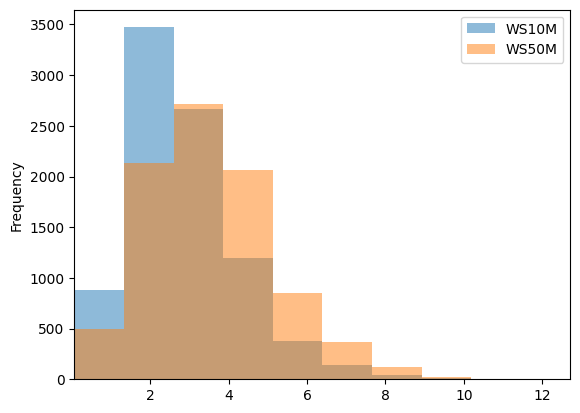

In [ ]:
plt.figure()

df[['WS10M', 'WS50M']].plot.hist(alpha=0.5)

ax = plt.gca()
ax.set_xlim([MIN_VAL, MAX_VAL])

plt.show()


<Figure size 640x480 with 0 Axes>

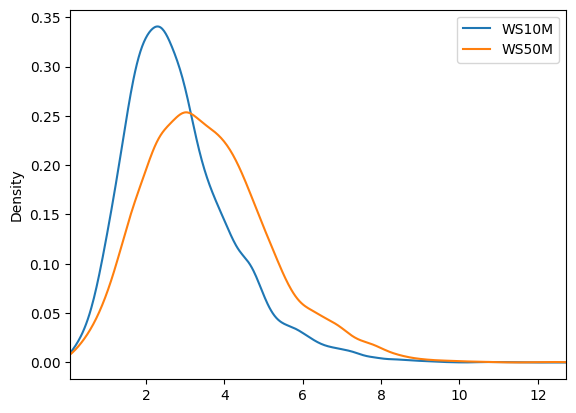

In [ ]:
plt.figure()

df[['WS10M', 'WS50M']].plot.kde()

ax = plt.gca()
ax.set_xlim([MIN_VAL, MAX_VAL])

plt.show()